# Seed Analysis

In [754]:
import sys

assert sys.version_info >= (3, 7)

In [755]:
#from google.colab import drive

## Mount Google Drive (for Colab users)
#try:
#    drive.mount('/content/drive')
#except:
#    pass

In [756]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [757]:
import pandas as pd

df = pd.read_csv('dataset/seeds_dataset.csv')

In [758]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            210 non-null    float64
 1   perimeter       210 non-null    float64
 2   compactness     210 non-null    float64
 3   kernel_length   210 non-null    float64
 4   kernel_width    210 non-null    float64
 5   asymmetry_coef  210 non-null    float64
 6   kernel_groove   210 non-null    float64
 7   class           210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [760]:
df['class'].unique()

array([1, 2, 3])

In [761]:
class_dfs = [df[df['class'] == i].drop('class', axis=1) for i in df['class'].unique()]

In [762]:
class_dfs[0].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000


In [763]:
class_dfs[1].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000


In [764]:
class_dfs[2].describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000


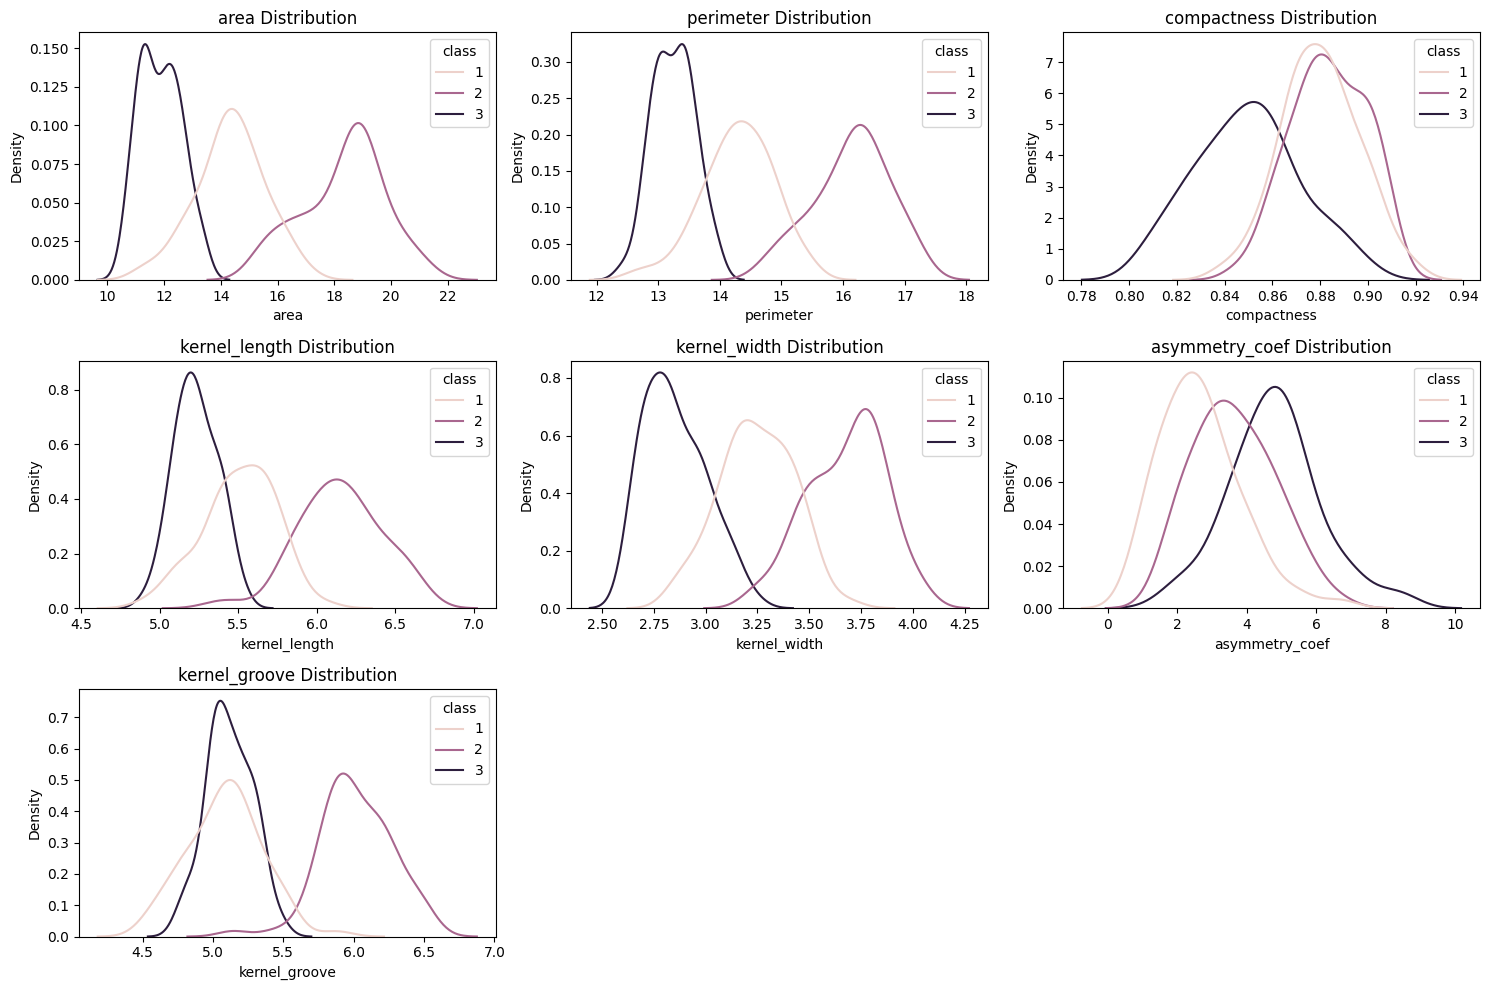

In [765]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='class')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

In [766]:
labels = df['class'].copy()
df_dropped = df.drop(columns=['class'])

print(df.head())

    area  perimeter  compactness  kernel_length  kernel_width  asymmetry_coef  \
0  15.26      14.84       0.8710          5.763         3.312           2.221   
1  14.88      14.57       0.8811          5.554         3.333           1.018   
2  14.29      14.09       0.9050          5.291         3.337           2.699   
3  13.84      13.94       0.8955          5.324         3.379           2.259   
4  16.14      14.99       0.9034          5.658         3.562           1.355   

   kernel_groove  class  
0          5.220      1  
1          4.956      1  
2          4.825      1  
3          4.805      1  
4          5.175      1  


In [767]:
print(df_dropped.describe().loc[['min', 'max']])

      area  perimeter  compactness  kernel_length  kernel_width  \
min  10.59      12.41       0.8081          4.899         2.630   
max  21.18      17.25       0.9183          6.675         4.033   

     asymmetry_coef  kernel_groove  
min          0.7651          4.519  
max          8.4560          6.550  


In [768]:
import numpy as np
import pandas as pd

def remove_outliers_by_class(df, labels, method='zscore', threshold=3):
    cleaned_indices = []
    
    for class_label in labels.unique():
        class_mask = labels == class_label
        class_data = df[class_mask] 
        class_indices = class_data.index
        
        if method == 'zscore':
            z_scores = np.abs((class_data - class_data.mean()) / class_data.std())
            keep_mask = ~(z_scores > threshold).any(axis=1)
        
        cleaned_indices.extend(class_indices[keep_mask])

    outlier_indices = list(set(df.index) - set(cleaned_indices))
    
    cleaned_df = df.loc[cleaned_indices]
    cleaned_labels = labels.loc[cleaned_indices]
    
    return cleaned_df, cleaned_labels, outlier_indices

df_clean_z, labels_clean_z, outliers_z = remove_outliers_by_class(df_dropped, labels, method='zscore', threshold=3)

print("Original dataset size:", len(df))
print("\nZ-score method (threshold=3):")
print("Outliers removed:", len(outliers_z))
print("Remaining samples:", len(df_clean_z))
print("Samples removed per class:")
for class_label in labels.unique():
    original_count = (labels == class_label).sum()
    cleaned_count = (labels_clean_z == class_label).sum()
    print(f"Class {class_label}: {original_count - cleaned_count} removed")

Original dataset size: 210

Z-score method (threshold=3):
Outliers removed: 2
Remaining samples: 208
Samples removed per class:
Class 1: 1 removed
Class 2: 1 removed
Class 3: 0 removed


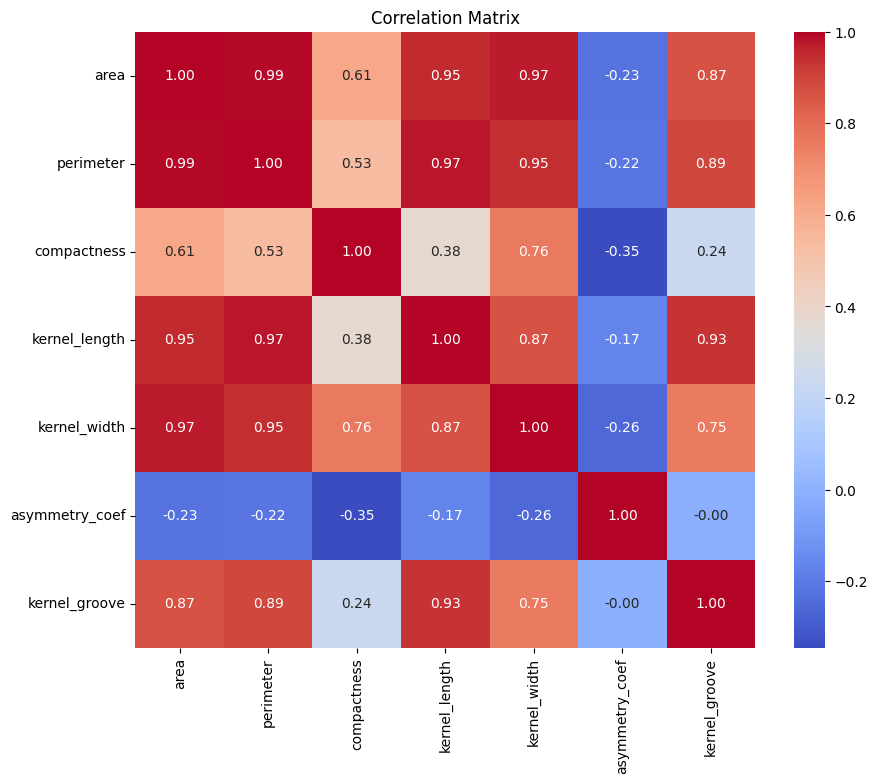

In [769]:
correlation_matrix = df_clean_z.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Explained variance ratio: [0.72084057 0.17230112 0.09368551]
Cumulative variance ratio: [0.72084057 0.89314168 0.98682719]


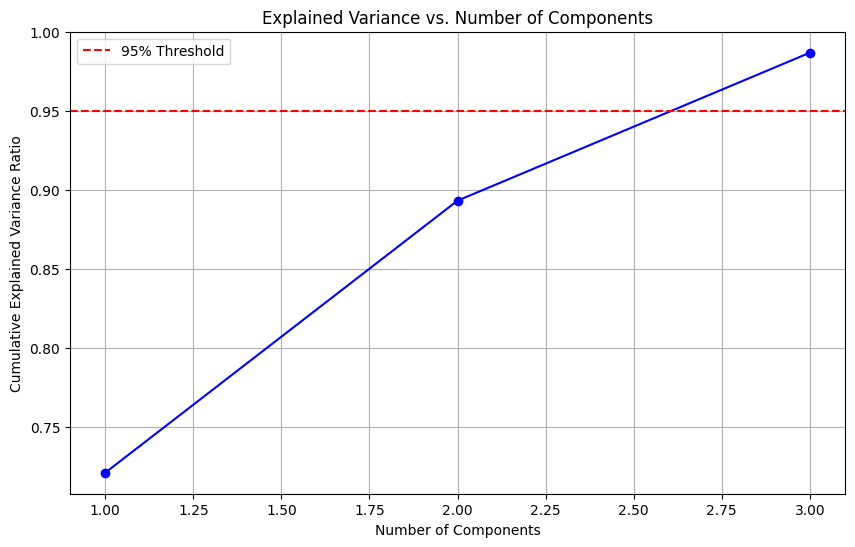

In [770]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean_z), columns=df_clean_z.columns)

pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance ratio:", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.legend()
plt.show()

In [771]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)
pca_4 = PCA(n_components=4)
pca_5 = PCA(n_components=5)

df_pca_2 = pca_2.fit_transform(df_scaled)
df_pca_3 = pca_3.fit_transform(df_scaled)
df_pca_4 = pca_4.fit_transform(df_scaled)
df_pca_5 = pca_5.fit_transform(df_scaled)

kmeans_2 = KMeans(n_clusters=3, random_state=42)
clusters_2 = kmeans_2.fit_predict(df_pca_2)

kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(df_pca_3)

kmeans_4 = KMeans(n_clusters=3, random_state=42)
clusters_4 = kmeans_4.fit_predict(df_pca_4)

kmeans_5 = KMeans(n_clusters=3, random_state=42)
clusters_5 = kmeans_5.fit_predict(df_pca_5)

print("2 Components:")
print(f"Silhouette Score: {silhouette_score(df_pca_2, clusters_2)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(labels_clean_z, clusters_2)}")

print("\n3 Components:")
print(f"Silhouette Score: {silhouette_score(df_pca_3, clusters_3)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(labels_clean_z, clusters_3)}")

print("\n4 Components:")
print(f"Silhouette Score: {silhouette_score(df_pca_4, clusters_4)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(labels_clean_z, clusters_4)}")

print("\n5 Components:")
print(f"Silhouette Score: {silhouette_score(df_pca_5, clusters_5)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(labels_clean_z, clusters_5)}")

2 Components:
Silhouette Score: 0.49541051681430176
Adjusted Rand Score: 0.7610998707451364

3 Components:
Silhouette Score: 0.41311248463878797
Adjusted Rand Score: 0.7962809013345001

4 Components:
Silhouette Score: 0.4082850347369104
Adjusted Rand Score: 0.8094985489431284

5 Components:
Silhouette Score: 0.40429606299290133
Adjusted Rand Score: 0.7843251680542458


In [772]:
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(df_scaled)

print("\nOriginal Scaled Features:")
print(f"Silhouette Score: {silhouette_score(df_scaled, clusters_original)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(labels_clean_z, clusters_original)}")


Original Scaled Features:
Silhouette Score: 0.40355631573253614
Adjusted Rand Score: 0.7843251680542458


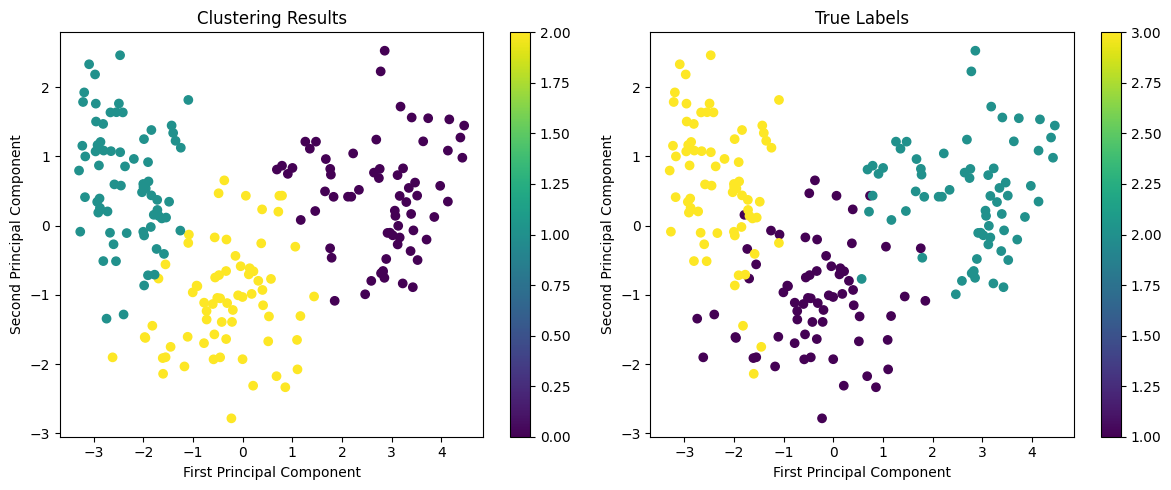

Silhouette Score: 0.408
Adjusted Rand Score: 0.809


In [773]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

def create_clustering_pipeline(df, labels, n_clusters=3, random_state=42):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    pca = PCA(n_components=4)
    df_pca = pca.fit_transform(df_scaled)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(df_pca)
    
    silhouette = silhouette_score(df_pca, clusters)
    ari = adjusted_rand_score(labels, clusters)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Clustering Results')
    plt.colorbar(scatter)
    
    plt.subplot(122)
    scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('True Labels')
    plt.colorbar(scatter)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'scaler': scaler,
        'pca': pca,
        'kmeans': kmeans,
        'transformed_data': df_pca,
        'clusters': clusters,
        'silhouette_score': silhouette,
        'adjusted_rand_score': ari
    }

results = create_clustering_pipeline(df_clean_z, labels_clean_z)

print(f"Silhouette Score: {results['silhouette_score']:.3f}")
print(f"Adjusted Rand Score: {results['adjusted_rand_score']:.3f}")

In [774]:
feature_importance = pd.DataFrame(
    results['pca'].components_,
    columns=df_clean_z.columns,
    index=[f'PC{i+1}' for i in range(4)]
)
print("\nPCA Components Feature Importance:")
print(feature_importance)

# Get explained variance for each component
explained_variance = results['pca'].explained_variance_ratio_
print("\nExplained Variance by Component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.3f}")


PCA Components Feature Importance:
         area  perimeter  compactness  kernel_length  kernel_width  \
PC1  0.443831   0.440848     0.279133       0.423614      0.432805   
PC2  0.028394   0.084678    -0.523057       0.201610     -0.111687   
PC3  0.022689  -0.064745     0.638635      -0.213893      0.215075   
PC4 -0.194096  -0.293798     0.328259      -0.261873     -0.203997   

     asymmetry_coef  kernel_groove  
PC1       -0.118584       0.387198  
PC2        0.724699       0.374334  
PC3        0.670647      -0.213691  
PC4       -0.095816       0.805532  

Explained Variance by Component:
PC1: 0.721
PC2: 0.172
PC3: 0.094
PC4: 0.010


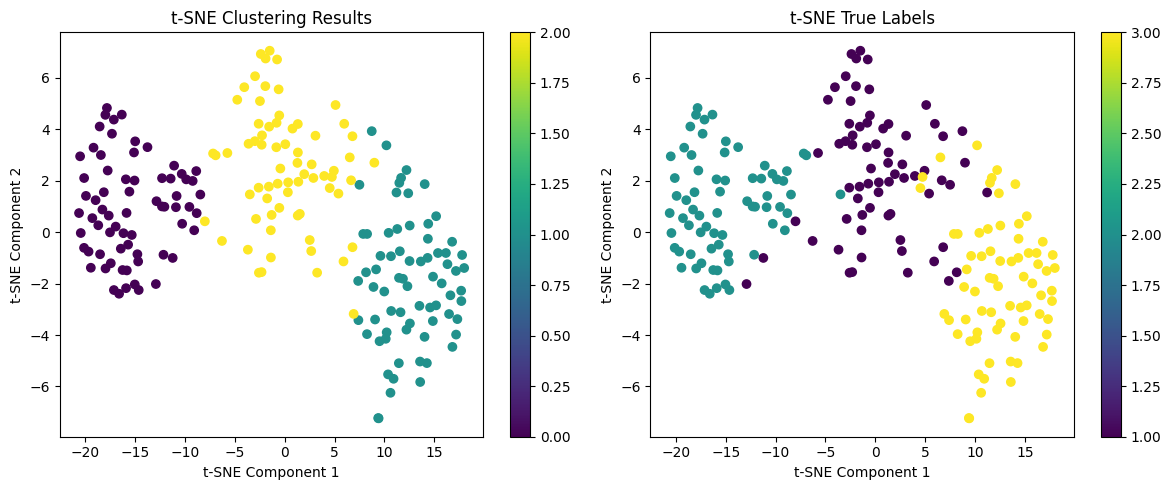

In [775]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
            c=results['clusters'],
            cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Clustering Results')
plt.colorbar()

plt.subplot(122)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
            c=labels_clean_z,
            cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE True Labels')
plt.colorbar()

plt.tight_layout()
plt.show()

In [776]:
import plotly.express as px

pca_3d = PCA(n_components=3)
pca_results_3d = pca_3d.fit_transform(df_scaled)

fig = px.scatter_3d(
    x=pca_results_3d[:, 0],
    y=pca_results_3d[:, 1],
    z=pca_results_3d[:, 2],
    color=clusters_4,
    title='3D PCA Clustering Results'
)
fig.show()

In [777]:
# Try to optimize hyperparameters

kmeans_params = {
    'n_clusters': [3],          
    'init': ['k-means++'],      
    'n_init': [10, 20, 30],     
    'max_iter': [100, 200, 300], 
    'tol': [1e-4, 1e-3]         
}

best_silhouette = -1
best_ari = -1
best_params_silhouette = None
best_params_ari = None
best_model_silhouette = None
best_model_ari = None

for n_init in kmeans_params['n_init']:
    for max_iter in kmeans_params['max_iter']:
        for tol in kmeans_params['tol']:
            kmeans = KMeans(
                n_clusters=3,
                init='k-means++',
                n_init=n_init,
                max_iter=max_iter,
                tol=tol,
                random_state=42
            )
            
            clusters = kmeans.fit_predict(df_pca_4)
            silhouette = silhouette_score(df_pca_4, clusters)
            ari = adjusted_rand_score(labels_clean_z, clusters)
            
            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params_silhouette = {'n_init': n_init, 'max_iter': max_iter, 'tol': tol}
                best_model_silhouette = kmeans
                
            if ari > best_ari:
                best_ari = ari
                best_params_ari = {'n_init': n_init, 'max_iter': max_iter, 'tol': tol}
                best_model_ari = kmeans

print("Best Parameters (Silhouette):", best_params_silhouette)
print("Best Silhouette Score:", best_silhouette)
print("\nBest Parameters (ARI):", best_params_ari)
print("Best ARI Score:", best_ari)

Best Parameters (Silhouette): {'n_init': 10, 'max_iter': 100, 'tol': 0.0001}
Best Silhouette Score: 0.40989342201484874

Best Parameters (ARI): {'n_init': 10, 'max_iter': 100, 'tol': 0.0001}
Best ARI Score: 0.7956406129731999


In [778]:
# def predict_cluster(new_data, pipeline):
#     scaled_data = pipeline['scaler'].transform(new_data)
#     pca_data = pipeline['pca'].transform(scaled_data)
#     predictions = pipeline['kmeans'].predict(pca_data)
    
#     return predictions

In [779]:

"""
# Assuming you have new data in the same format:
new_data = pd.DataFrame(...)  # New data with same features
predictions = predict_cluster(new_data, results)
"""

'\n# Assuming you have new data in the same format:\nnew_data = pd.DataFrame(...)  # New data with same features\npredictions = predict_cluster(new_data, results)\n'

In [780]:
# Optional: Save the models for later use
# import joblib

# def save_pipeline(pipeline, filename_prefix='cluster_pipeline'):
#     joblib.dump(pipeline['scaler'], f'{filename_prefix}_scaler.pkl')
#     joblib.dump(pipeline['pca'], f'{filename_prefix}_pca.pkl')
#     joblib.dump(pipeline['kmeans'], f'{filename_prefix}_kmeans.pkl')

# save_pipeline(results)